In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## De data inlezen

In [7]:
df = pd.read_csv('data/competition-train.csv')
df.set_index("Individu-ID")
df.head()

,Individu-ID,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,BMI,hartslag,glucose,prognose10jaar
0,#203910,V,39,1,30,62,-,-,-,-,?,122.5,80.0,18,105,?,CHD-
1,#248527,M,60,4,0,39,-,-,-,-,250,133.0,89.5,27,90,?,CHD-
2,#302622,M,42,2,0,41,-,-,-,-,274,121.0,61.5,25,80,76,CHD-
3,#142075,M,41,1,20,68,-,-,-,-,234,103.0,71.0,21,68,82,CHD+
4,#162498,V,50,3,0,38,-,-,-,-,309,136.0,90.0,26,70,75,CHD-


Wat is de classificatie?

In [293]:
df["prognose10jaar"].unique().tolist()

['CHD-', 'CHD+']

CHD betekent Coronary Heart Disease.
Dus ze hebben gekeken na 10 jaar op ze het hebben gekregen ja of nee.

## Checken op nan en null aanwezige data.

In [8]:
df_prognose = df

In [255]:
df_prognose.shape

(3240, 17)

In [256]:
df_prognose.dtypes

Individu-ID            object
geslacht               object
leeftijd                int64
opleidingsniveau       object
cigaretten_per_dag     object
slaapscore              int64
hypertensie            object
hartinfarct            object
diabetes               object
nierziekte             object
cholesterol            object
bovendruk             float64
onderdruk             float64
BMI                    object
hartslag               object
glucose                object
prognose10jaar         object
dtype: object

Combinatie van nominaal en numerieke waarde.

In [257]:
df_prognose.describe()

,leeftijd,slaapscore,bovendruk,onderdruk
count,3240.000000,3240.000000,3240.000000,3240.000000
mean,49.517284,55.410802,132.040895,82.816049
std,8.787376,18.015912,21.868117,11.920207
min,29.000000,4.000000,83.500000,48.000000
25%,42.000000,42.000000,117.000000,74.500000
50%,49.000000,56.000000,128.000000,82.000000
75%,56.000000,69.000000,143.500000,89.000000
max,71.000000,97.000000,295.000000,142.500000


Waarden lopen veel uiteen

In [258]:
pd.DataFrame({"isna" : df_prognose.isna().sum(),
                    "isnull" : df_prognose.isnull().sum()})

,isna,isnull
Individu-ID,0,0
geslacht,0,0
leeftijd,0,0
opleidingsniveau,0,0
cigaretten_per_dag,0,0
slaapscore,0,0
hypertensie,0,0
hartinfarct,0,0
diabetes,0,0
nierziekte,0,0


Er zijn geen NA en NULL aanwezig. Maar er zijn wel duidelijk op plekken een vraagteken aanwezig.

In [9]:
result_df = pd.DataFrame()

for col in df_prognose:
    unique_values = pd.Series(df_prognose[col].unique(), name=col)
    result_df = pd.concat([result_df, unique_values], axis=1)

result_df.head(10)

,Individu-ID,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,BMI,hartslag,glucose,prognose10jaar
0,#203910,V,39.0,1,30,62.0,-,-,-,-,?,122.5,80.0,18,105,?,CHD-
1,#248527,M,60.0,4,0,39.0,+,+,+,+,250,133.0,89.5,27,90,76,CHD+
2,#302622,NaN,42.0,2,20,41.0,NaN,NaN,NaN,?,274,121.0,61.5,25,80,82,NaN
3,#142075,NaN,41.0,3,9,68.0,NaN,NaN,NaN,NaN,234,103.0,71.0,21,68,75,NaN
4,#162498,NaN,50.0,?,3,38.0,NaN,NaN,NaN,NaN,309,136.0,90.0,26,70,87,NaN
5,#206831,NaN,54.0,NaN,40,54.0,NaN,NaN,NaN,NaN,214,147.0,74.0,24,96,68,NaN
6,#293943,NaN,44.0,NaN,15,37.0,NaN,NaN,NaN,NaN,242,118.0,72.0,16,60,73,NaN
7,#183217,NaN,37.0,NaN,5,65.0,NaN,NaN,NaN,NaN,213,110.0,75.0,23,58,72,NaN
8,#299552,NaN,57.0,NaN,19,57.0,NaN,NaN,NaN,NaN,200,100.0,96.0,39,77,71,NaN
9,#328144,NaN,51.0,NaN,1,79.0,NaN,NaN,NaN,NaN,246,161.0,94.0,22,122,70,NaN


Waar een vraagteken aanwezig is. En kolommen die een object als variable hebben maar een int zijn.

In [10]:
d = []
for vraag in list(df_prognose.columns):
    counted = df_prognose[df_prognose[vraag] == "?"]
    d.append(len(counted))

pd.DataFrame(d, index=list(df_prognose.columns), columns=["aantal vraagtekens"])

,aantal vraagtekens
Individu-ID,0
geslacht,0
leeftijd,0
opleidingsniveau,77
cigaretten_per_dag,21
slaapscore,0
hypertensie,0
hartinfarct,0
diabetes,0
nierziekte,8


## Drop vraagteken

In [11]:
vraagteken = ["opleidingsniveau", "nierziekte", "cholesterol", "glucose", "BMI", "hartslag", "cigaretten_per_dag"]

for vraag in vraagteken:
    df_prognose = df_prognose.drop(df_prognose[df_prognose[vraag] == "?"].index)

## To int

In [12]:
to_int = ["opleidingsniveau", "cholesterol", "glucose", "BMI", "hartslag", "cigaretten_per_dag", "slaapscore", "onderdruk", "bovendruk"]
df_prognose[to_int] = df_prognose[to_int].astype(int)

df_prognose.dtypes

Individu-ID           object
geslacht              object
leeftijd               int64
opleidingsniveau       int32
cigaretten_per_dag     int32
slaapscore             int32
hypertensie           object
hartinfarct           object
diabetes              object
nierziekte            object
cholesterol            int32
bovendruk              int32
onderdruk              int32
BMI                    int32
hartslag               int32
glucose                int32
prognose10jaar        object
dtype: object

Kijken naar de verdeling van alle kollommen. Eerst alleen naar de numerieke, en kijken of een log of wortel een betere verdeling kan vormen.

In [28]:
int_value = ["leeftijd", "opleidingsniveau", "slaapscore", "bovendruk", "onderdruk", "glucose", "cigaretten_per_dag", "hartslag", "BMI" ]

array([[<Axes: title={'center': 'leeftijd'}>,
        <Axes: title={'center': 'opleidingsniveau'}>,
        <Axes: title={'center': 'cigaretten_per_dag'}>],
       [<Axes: title={'center': 'slaapscore'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'bovendruk'}>],
       [<Axes: title={'center': 'onderdruk'}>,
        <Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'hartslag'}>],
       [<Axes: title={'center': 'glucose'}>, <Axes: >, <Axes: >]],
      dtype=object)

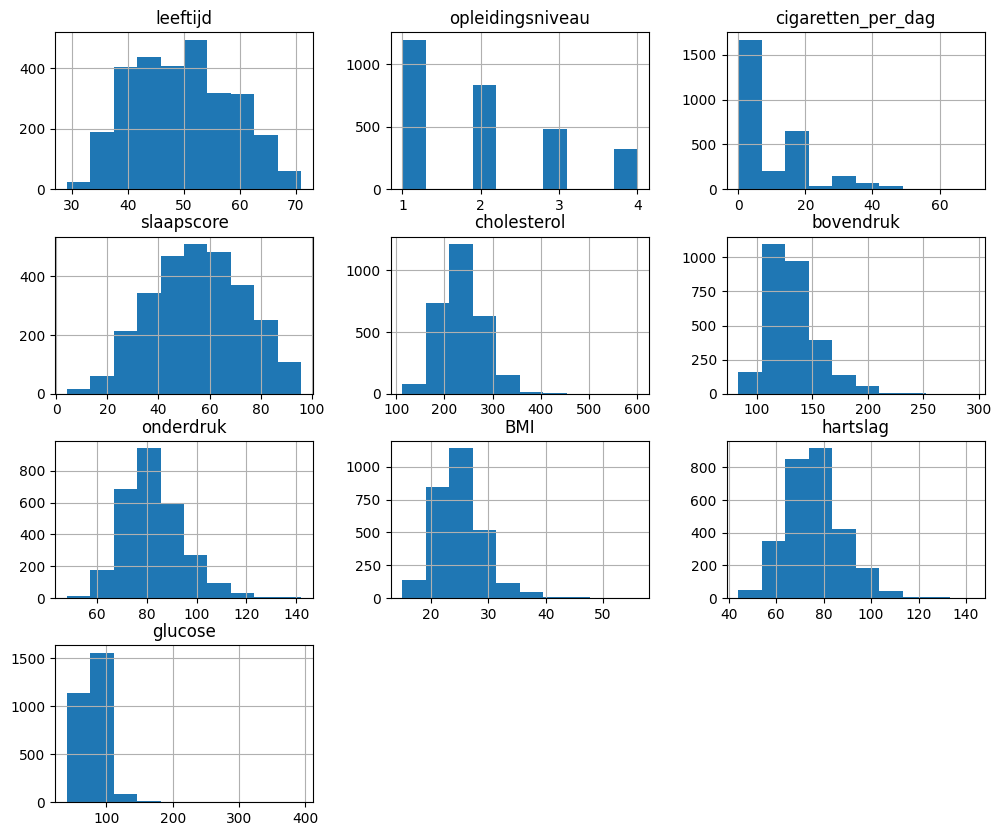

In [29]:
df_prognose.hist(figsize=(12,10))

In [27]:
df_log = pd.DataFrame()
for col in int_value[:7]:
    new_attribute = "log(" + col + ")"
    df_log[new_attribute] = np.log(df_prognose[col])

NameError: name 'int_value' is not defined

Op BMI en hartslag kan geen log transformatie

In [26]:
df_log.hist(figsize=(20,15))

NameError: name 'df_log' is not defined

In [268]:
dfsqrt = pd.DataFrame()
for col in int_value:
    new_attribute = "sqrt(" + col + ")"
    dfsqrt[new_attribute] = np.sqrt(df_prognose[col])


array([[<Axes: title={'center': 'sqrt(leeftijd)'}>,
        <Axes: title={'center': 'sqrt(opleidingsniveau)'}>,
        <Axes: title={'center': 'sqrt(slaapscore)'}>],
       [<Axes: title={'center': 'sqrt(bovendruk)'}>,
        <Axes: title={'center': 'sqrt(onderdruk)'}>,
        <Axes: title={'center': 'sqrt(glucose)'}>],
       [<Axes: title={'center': 'sqrt(cigaretten_per_dag)'}>,
        <Axes: title={'center': 'sqrt(hartslag)'}>,
        <Axes: title={'center': 'sqrt(BMI)'}>]], dtype=object)

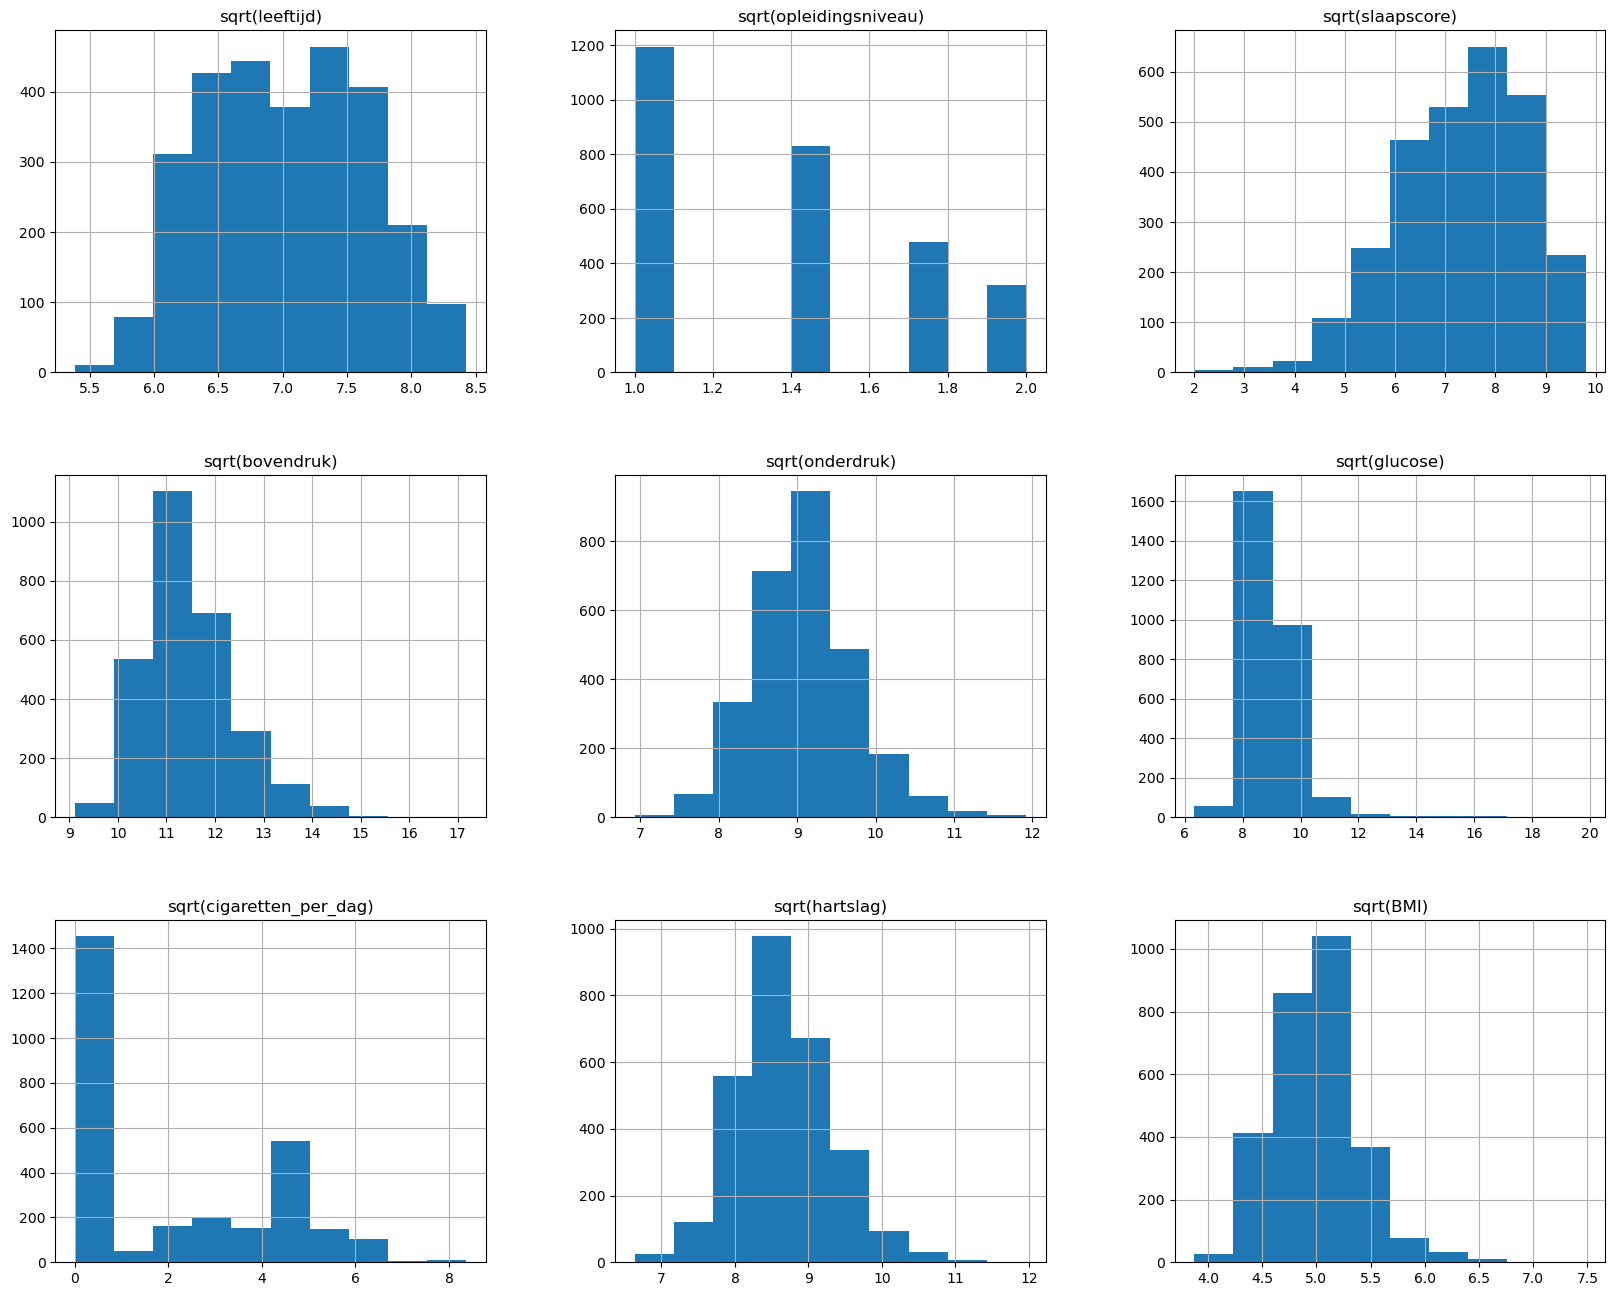

In [269]:
dfsqrt.hist(figsize=(20, 16))

Kijkende naar de bovenstaande grafieken, gaan we de log houden van glucose en  onderdruk. En de wortel van BMI.

Alleen bij machine learning vind de functie kbest van sklearn log niet leuk. hiervoor kiezen we er voor om het toch niet te gebruiken.

## Kijken naar de verdeling van de nominale waardes.

In [271]:
df_prognose

,Individu-ID,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,hartslag,prognose10jaar,log(glucose),sqrt(BMI)
2,#302622,M,42,2,0,41,-,-,-,-,274,121,61,80,CHD-,4.330733,5.000000
3,#142075,M,41,1,20,68,-,-,-,-,234,103,71,68,CHD+,4.406719,4.582576
4,#162498,V,50,3,0,38,-,-,-,-,309,136,90,70,CHD-,4.317488,5.099020
5,#206831,M,54,1,20,54,+,-,-,-,214,147,74,96,CHD-,4.465908,4.898979
7,#183217,V,37,2,0,37,-,-,-,-,242,110,75,58,CHD-,4.219508,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,#170800,V,38,1,30,71,-,-,-,-,164,113,68,70,CHD-,4.317488,5.000000
3236,#313110,V,32,3,15,64,-,-,-,-,199,116,81,75,CHD-,4.532599,4.582576
3237,#226915,V,46,3,0,18,+,-,-,-,237,196,120,58,CHD+,4.094345,5.567764
3238,#213677,V,58,1,0,78,-,-,-,-,205,142,74,85,CHD-,4.418841,5.000000


In [272]:
str_value = ["geslacht", "hypertensie", "hartinfarct", "diabetes", "nierziekte"]

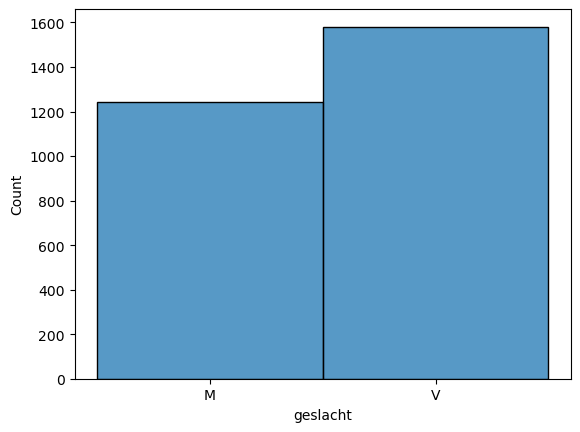

In [273]:
sns.histplot(df_prognose, x=str_value[0]);


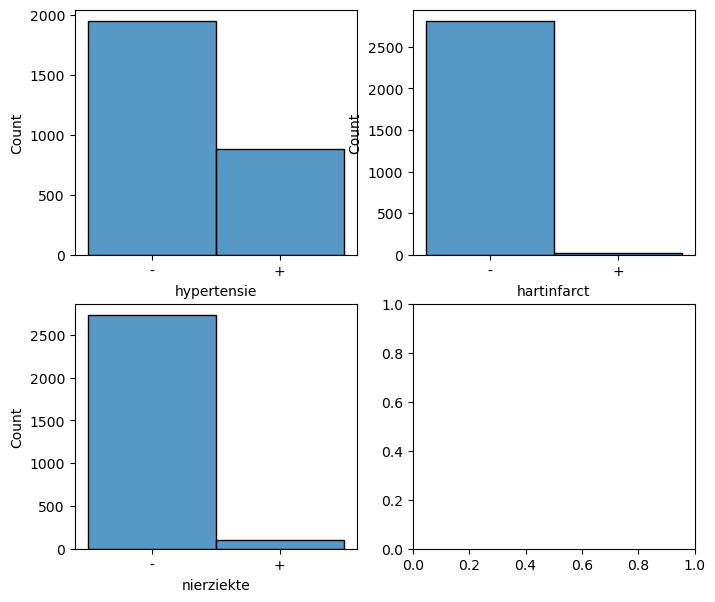

In [274]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 7));

sns.histplot(df_prognose, x=str_value[1], ax=axes[0,0]);
sns.histplot(df_prognose, x=str_value[2], ax=axes[0,1]);
sns.histplot(df_prognose, x=str_value[4], ax=axes[1,0]);

Hier zie je dat er grootte verschillen zijn de aantallen van mensen met bepaalde ziekten.

## De verdeling van de classificatie

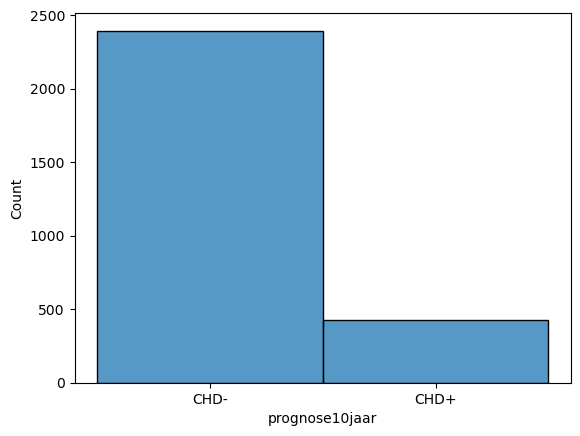

In [275]:
sns.histplot(df_prognose, x="prognose10jaar");

DataFrame voor het verwijderen van de data wat we hebben gedaan

In [276]:
df.groupby("prognose10jaar").count()

,Individu-ID,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,BMI,hartslag,glucose
prognose10jaar,,,,,,,,,,,,,,,,
CHD+,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485,485
CHD-,2755,2755,2755,2755,2755,2755,2755,2755,2755,2755,2755,2755,2755,2755,2755,2755


DataFrame na het verwijderen van de data wat we hebben gedaan

In [277]:
df_prognose.groupby("prognose10jaar").count()


,Individu-ID,geslacht,leeftijd,opleidingsniveau,cigaretten_per_dag,slaapscore,hypertensie,hartinfarct,diabetes,nierziekte,cholesterol,bovendruk,onderdruk,hartslag,log(glucose),sqrt(BMI)
prognose10jaar,,,,,,,,,,,,,,,,
CHD+,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430,430
CHD-,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396,2396


We kiezen er dus bewust voor om 50 personen uit de CHD+ te verwijderen.
Ja daar mag smote over heen gegooid worden.

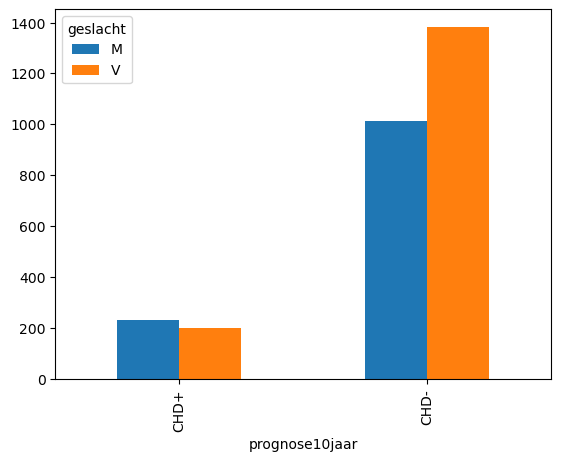

In [279]:
df_bar = df_prognose.groupby(["prognose10jaar", "geslacht"]).size()
df_bar = df_bar.unstack()
df_bar.plot(kind="bar");

In [ ]:
sns.pairplot(df_prognose, hue="geslacht", plot_kws={'alpha': 0.1});


Best wel overlappend van mannen en vrouwen dus een geslacht zou geen grootte verschillen er in brengen.

## Alle nominale waardes veranderen naar getallen.

In [13]:
df_meh = df_prognose
df_meh = df_meh.replace("CHD+", 1.0)
df_meh = df_meh.replace("CHD-", 0.0)
df_meh = df_meh.replace("M", 0.0)
df_meh = df_meh.replace("V", 1.0)
df_meh = df_meh.replace("-", 0.0)
df_meh = df_meh.replace("+", 1.0)


C:\Users\Laris\AppData\Local\Temp\ipykernel_21688\1051799176.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_meh = df_meh.replace("CHD-", 0.0)
C:\Users\Laris\AppData\Local\Temp\ipykernel_21688\1051799176.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_meh = df_meh.replace("V", 1.0)
C:\Users\Laris\AppData\Local\Temp\ipykernel_21688\1051799176.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(co

In [89]:
int_value 

['leeftijd',
 'opleidingsniveau',
 'slaapscore',
 'cholesterol',
 'bovendruk',
 'onderdruk',
 'glucose',
 'cigaretten_per_dag',
 'hartslag',
 'BMI']

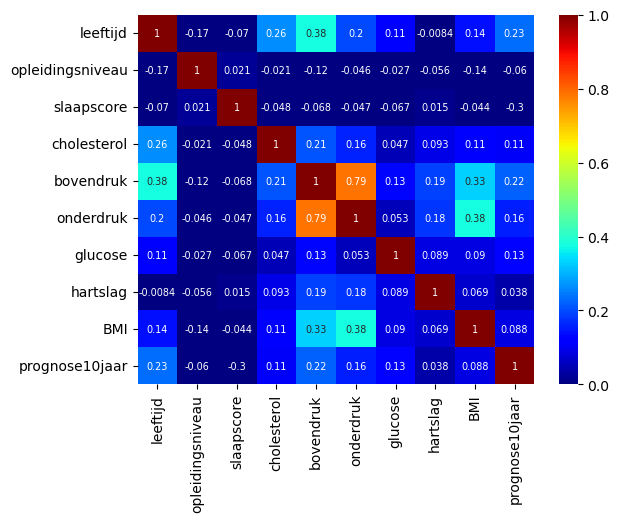

In [309]:
int_value = ["leeftijd", "opleidingsniveau", "slaapscore", "cholesterol", "bovendruk", "onderdruk", "glucose", "hartslag", "BMI", "prognose10jaar"]
axs = sns.heatmap(df_meh[int_value].corr(), annot=True, annot_kws={"fontsize": "x-small"}, cmap="jet", vmin=0.0, vmax=1.0)

In [ ]:
sns.pairplot(df_prognose, hue="prognose10jaar", plot_kws={'alpha': 0.1});

## Machine learning

In [14]:
df_meh.drop("Individu-ID", axis=1, inplace=True)

In [15]:

X = df_meh.iloc[:,:-1].to_numpy()
y= df_meh["prognose10jaar"].to_numpy()

In [29]:
X.shape, y.shape, X.dtype, y.dtype
# X.astype(float)

((2826, 16), (2826,), dtype('O'), dtype('float64'))

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [180]:
X_train_smote.shape, y_train_smote.shape

((3228, 15), (3228,))

In [21]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC


models = [
    DummyClassifier,
    DecisionTreeClassifier,
    GaussianNB,
    KNeighborsClassifier,
    RandomForestClassifier,
    RidgeClassifier,
    LogisticRegression,
    QuadraticDiscriminantAnalysis,
    LinearDiscriminantAnalysis,
    AdaBoostClassifier,
    SVC]

In [45]:
from sklearn.model_selection import cross_validate

metric_scores = {}
for model in models:
    scores = cross_validate(model(), X_train_smote, y_train_smote, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{model.__name__}"] = scores
    
pd.DataFrame(metric_scores).T

c:\Users\Laris\miniconda3\envs\ml_bodyfat\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Laris\miniconda3\envs\ml_bodyfat\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

,fit_time,score_time,test_score,train_score
DummyClassifier,0.000396,0.000774,0.499690,0.500077
DecisionTreeClassifier,0.031363,0.004229,0.839858,1.000000
GaussianNB,0.004388,0.000203,0.641255,0.647383
KNeighborsClassifier,0.008535,0.076921,0.830553,0.880267
RandomForestClassifier,0.835505,0.022232,0.922266,1.000000
RidgeClassifier,0.009791,0.002226,0.732963,0.734666
LogisticRegression,0.084976,0.002044,0.731723,0.738228
QuadraticDiscriminantAnalysis,0.007430,0.002642,0.662631,0.679757
LinearDiscriminantAnalysis,0.010259,0.001614,0.732654,0.734898
AdaBoostClassifier,0.410953,0.018023,0.843594,0.871982


Kijkende naar bovenstaande waarde, is er voor veel een overfitting gaande. Een klein beetje zien wij niet als heel erg. Daardoor kiezen wij voor AdaBoostClassifier, deze heeft een hoge test en train score.

In [67]:
from sklearn.metrics import accuracy_score
import optuna
from optuna.samplers import TPESampler

def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    learning_rate = trial.suggest_float("learning_rate", 0.001, 1.0, log=True)
    model = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate, random_state=1)
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)


sampler = TPESampler(seed=1)
study = optuna.create_study(direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

c:\Users\Laris\miniconda3\envs\ml_bodyfat\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Laris\miniconda3\envs\ml_bodyfat\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Laris\miniconda3\envs\ml_bodyfat\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Laris\miniconda3\envs\ml_bodyfat\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

Number of finished trials:  100
Best trial:
  Value:  0.8553054662379421
  Params: 
    n_estimators: 329
    learning_rate: 0.6002350758910581


Voor het model AdaBoostClassifier zijn de beste parameters.

Best trial:
  Value:  0.8553054662379421
  Params: 
    n_estimators: 329
    learning_rate: 0.6002350758910581

In [68]:
from sklearn.feature_selection import SelectKBest
temp = df_meh.drop("prognose10jaar", axis=1)

selector = SelectKBest(k=15).fit(X_train_smote, y_train_smote)

pd.DataFrame({"Attribute": temp.columns, "Score": selector.scores_}).sort_values("Score", ascending=False).set_index("Attribute")

,Score
Attribute,
slaapscore,701.472458
leeftijd,414.432277
bovendruk,262.659547
hypertensie,154.885117
onderdruk,134.871335
glucose,56.099414
cholesterol,55.256433
opleidingsniveau,41.755692
hartinfarct,37.542547


In [70]:
metric_scores = {}
k = 15
while k:
    X_select = SelectKBest(k=k).fit_transform(X_train_smote, y_train_smote)
    scores = cross_validate(AdaBoostClassifier(n_estimators=trial.params["n_estimators"], learning_rate=trial.params["learning_rate"], random_state=1), X_select, y_train_smote, return_train_score=True)
    for key, val in scores.items():
        scores[key] = val.mean()
    metric_scores[f"{k} features"] = scores
    k -= 1

pd.DataFrame(metric_scores).T

c:\Users\Laris\miniconda3\envs\ml_bodyfat\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Laris\miniconda3\envs\ml_bodyfat\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Laris\miniconda3\envs\ml_bodyfat\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Laris\miniconda3\envs\ml_bodyfat\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

,fit_time,score_time,test_score,train_score
15 features,2.827658,0.116706,0.862802,0.912642
14 features,2.627787,0.105599,0.866519,0.912719
13 features,2.535312,0.104535,0.864353,0.906369
12 features,2.551657,0.108553,0.861259,0.909854
11 features,2.458367,0.121668,0.859394,0.895913
10 features,2.480218,0.112599,0.859704,0.897075
9 features,2.372433,0.112832,0.836150,0.875699
8 features,2.431013,0.111489,0.834907,0.874692
7 features,2.303824,0.103295,0.786260,0.834109
6 features,2.019729,0.097884,0.788429,0.832947


We kiezen voor 14 features, we krijgen de hoogste test score met de minste aantal features.

In [102]:
X_train_smote[:,:14]

array([[ 1.        , 58.        ,  1.        , ..., 77.        ,
        23.        , 65.        ],
       [ 0.        , 62.        ,  1.        , ..., 81.        ,
        28.        , 56.        ],
       [ 1.        , 46.        ,  4.        , ..., 99.        ,
        27.        , 73.        ],
       ...,
       [ 0.        , 48.57204864,  3.14409729, ..., 95.86024322,
        25.56770814, 67.43229186],
       [ 0.48733227, 64.43666137,  1.        , ..., 71.46199682,
        23.92399364, 84.87332274],
       [ 0.70651118, 45.46744412,  1.70651118, ..., 89.52186588,
        22.05442176, 87.01069001]])

In [22]:
y= y_train_smote
X = X_train_smote[:,:14]

my_model = AdaBoostClassifier(n_estimators=329, learning_rate=0.6002350758910581, random_state=1)

my_model.fit(X,y)


c:\Users\Laris\miniconda3\envs\ml_bodyfat\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.6002350758910581, n_estimators=329,
                   random_state=1)

## Prediction

In [23]:
prediction = my_model.predict(X_test[:,:14])

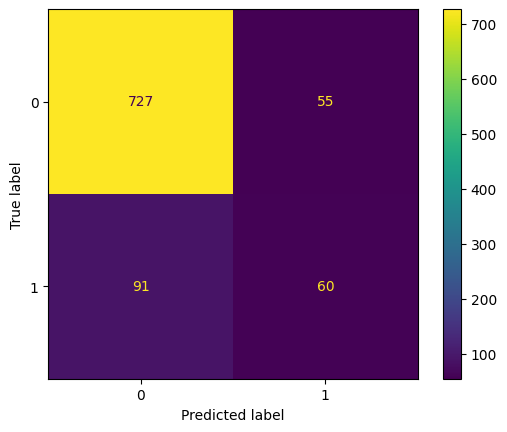

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


conf_mat = confusion_matrix(y_test, prediction)

ConfusionMatrixDisplay(conf_mat).plot(include_values=True);

## Conclusie:
- In de confusion matrix is te zien, dat het overgrote deel wordt geclassificeerd als true negative (top left), 60 items worden geclassificeerd als true positive (bottom right);
- Tevens is te zien dat er 91 vals negatieven zijn (bottom left) en 55 vals positieven (top right), dit zijn vrij hoge scores.

## Maak package

In [82]:
import pickle

with open("model/model.pkl", "wb") as file:
    pickle.dump(my_model, file)

In [88]:
with open("model/model.pkl", "rb") as file:
    new_model = pickle.load(file)

## Gebruik package

In [2]:
from model.theclassifier import Ourmodel

package_model = Ourmodel()

predi = package_model.predict("data/competition-train-noclass.csv")
predi

c:\Users\Laris\Documents\bioinf_local\year 2\repos\p_3\ml_bodyfat_prediction\model\theclassifier.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_meh = df_meh.replace("V", 1.0)
c:\Users\Laris\Documents\bioinf_local\year 2\repos\p_3\ml_bodyfat_prediction\model\theclassifier.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_meh = df_meh.replace("+", 1.0)
c:\Users\Laris\miniconda3\envs\ml_bodyfat\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from ve

array([0., 0., 0., ..., 1., 0., 0.])

## Of deze :)

In [1]:
from model import model_factory
package_model = model_factory()

predi = package_model.predict("data/competition-train-noclass.csv")
predi

c:\Users\Laris\Documents\bioinf_local\year 2\repos\p_3\ml_bodyfat_prediction\model\theclassifier.py:48: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_meh = df_meh.replace("V", 1.0)
c:\Users\Laris\Documents\bioinf_local\year 2\repos\p_3\ml_bodyfat_prediction\model\theclassifier.py:50: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_meh = df_meh.replace("+", 1.0)
c:\Users\Laris\miniconda3\envs\ml_bodyfat\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from ve

array([0., 0., 0., ..., 1., 0., 0.])